In [1]:
#referene: gridSearchBasic
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import mglearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data set
alcohol = pd.read_csv("alcohol.txt")
# Remove squaredal terms - these terms i
alcohol.drop(['agesq','beertaxsq','cigtaxsq','ethanolsq','educsq'],axis=1,inplace=True)
alcohol.head()

,id,abuse,status,unemrate,age,educ,married,famsize,white,exhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
0,1,1,1,4.0,50,4,1,1,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,0,0
1,2,0,3,4.0,37,12,1,5,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
2,3,0,3,4.0,53,9,1,3,1,1,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
3,4,0,3,3.3,59,11,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,0,0,1,1
4,5,0,3,3.3,43,10,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,1,1,1,1


8848
974


(array([974.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

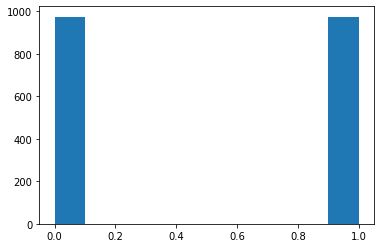

In [4]:
#Undersample Class 0
# generate special classes for types
count0, count1 = alcohol.abuse.value_counts()
aclass0 = alcohol[alcohol.abuse==0]
aclass1 = alcohol[alcohol.abuse==1]
print(count0)
print(count1)

# under sampling
# Generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
alcoholus = pd.concat([under0,aclass1],axis=0)

#plot the concat result
plt.hist(alcoholus.abuse)

In [5]:
# set up data, and check if balanced
y = alcoholus.abuse
X = alcoholus.iloc[:,2:33]
print(np.mean(y))
X.head()

0.5


,status,unemrate,age,educ,married,famsize,white,exhealth,vghealth,goodhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
4520,3,5.1,25,12,1,2,1,1,0,0,...,1,0,0.240,18.0,1.79757,0,0,0,1,1
9018,3,3.3,52,16,0,1,1,0,1,0,...,0,0,0.240,26.0,2.44998,0,1,1,1,1
9748,3,6.2,30,16,1,2,1,0,0,1,...,0,0,0.202,31.0,2.08671,1,1,1,1,1
7311,3,6.2,51,13,1,2,1,1,0,0,...,0,1,0.202,31.0,2.08671,0,0,0,1,1
5580,3,4.2,30,14,1,1,0,1,0,0,...,0,1,0.124,21.0,2.06295,0,1,1,1,1


    rank_test_score  mean_test_score param_logisticregression__C
0                15         0.485955                       1e-05
1                14         0.515031                      0.0001
2                 2         0.548604                       0.001
3                 1         0.550452                        0.01
4                 3         0.546489                         0.1
5                 4         0.543819                           1
6                 5         0.543368                          10
7                11         0.543347                         100
8                11         0.543347                        1000
9                11         0.543347                       10000
10                5         0.543368                      100000
11                5         0.543368                       1e+06
12                5         0.543368                       1e+07
13                5         0.543368                       1e+08
14                5      

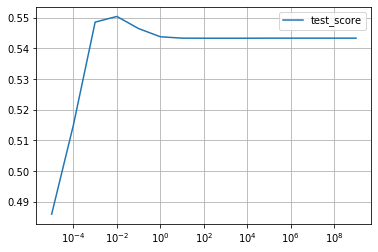

In [7]:
# Logistic Regression
# This time set up pipeline with standardscaler

from sklearn.model_selection import GridSearchCV
nmc = 100
Clist = np.power(10.,range(-5,10))

# Build pipeline
#   Note: model names are given names, but all small letters (odd system)
fullModel_lr = make_pipeline(StandardScaler(),LogisticRegression())
# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
param_grid={'logisticregression__C':Clist,'logisticregression__max_iter':[3000]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(fullModel_lr,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results_lr = pd.DataFrame(grid_search.cv_results_)
print(results_lr[['rank_test_score','mean_test_score','param_logisticregression__C']])

#plot the result
plt.semilogx(Clist,results_lr[['mean_test_score']],label = "test_score")
plt.legend()
plt.grid()

In [8]:
result_lr = results_lr[['rank_test_score','mean_test_score','param_logisticregression__C']]
C_lr = result_lr[result_lr.rank_test_score==1].iat[0,2]
score_lr = result_lr[result_lr.rank_test_score==1].iat[0,1]
print("The optimized C is", C_lr, "and the test score is {:.4f}.".format(score_lr))

The optimized C is 0.01 and the test score is 0.5505.


   rank_test_score  mean_test_score param_kneighborsclassifier__n_neighbors
0                7         0.505257                                      10
1                6         0.528850                                      50
2                2         0.534251                                     100
3                1         0.539363                                     200
4                4         0.532813                                     300
5                3         0.533470                                     400
6                5         0.532238                                     500


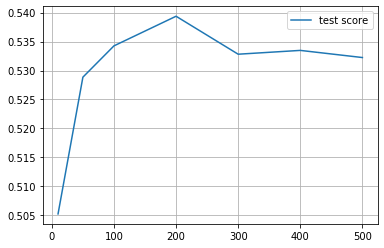

In [9]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
neighbors_settings = [10,50,100,200,300,400,500]
nmc=100

#   Note: model names are given names, but all small letters
fullModel_knn = make_pipeline(StandardScaler(),KNeighborsClassifier())
# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
param_grid={'kneighborsclassifier__n_neighbors':[10,50,100,200,300,400,500]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(fullModel_knn,param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results_knn = pd.DataFrame(grid_search.cv_results_)
print(results_knn[['rank_test_score','mean_test_score','param_kneighborsclassifier__n_neighbors']])

plt.plot(neighbors_settings,results_knn[['mean_test_score']],label="test score")
plt.legend()
plt.grid()

In [10]:
result_knn = results_knn[['rank_test_score','mean_test_score','param_kneighborsclassifier__n_neighbors']]
k_knn = result_knn[result_knn.rank_test_score==1].iat[0,2]
score_knn = result_knn[result_knn.rank_test_score==1].iat[0,1]
print("The optimized k is", k_knn,"and the test score is {:.4f}.".format(score_knn))

The optimized k is 200 and the test score is 0.5394.


In [118]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':range(1,11),'max_depth':range(2,12,2),'n_estimators':[100]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

    rank_test_score  mean_test_score param_max_features param_max_depth
0                41         0.555400                  1               2
1                26         0.562259                  2               2
2                22         0.564271                  3               2
3                19         0.565749                  4               2
4                15         0.567023                  5               2
5                10         0.568542                  6               2
6                13         0.567762                  7               2
7                 8         0.569097                  8               2
8                 6         0.570452                  9               2
9                 7         0.569528                 10               2
10               33         0.558789                  1               4
11               24         0.563121                  2               4
12               14         0.567207                  3         

In [120]:
result = results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']]
max_feature = result[result.rank_test_score==1].iat[0,2]
depth = result[result.rank_test_score==1].iat[0,3]
score_tree = result[result.rank_test_score==1].iat[0,1]
print("The optimized feature size is",max_feature,", tree depth", depth,"and the test score is {:.4f}.".format(score_tree))

The optimized feature size is 10 , tree depth 4 and the test score is 0.5727.


In [121]:
print("The scale of data influence neither the split point(node) nor the tree structure. And random forest only cares about the distribution and the probability of features. So, there is no need to do rescaling here.")

The scale of data influence neither the split point(node) nor the tree structure. And random forest only cares about the distribution and the probability of features. So, there is no need to do rescaling here.
